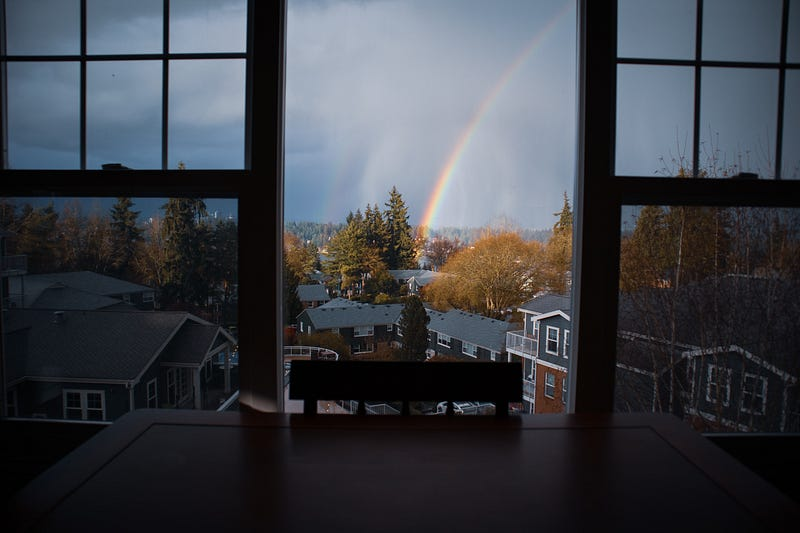

# Regression Analysis Project

**Authors:** Clara Giurgiu, Stephanie Ciaccia

## Overview


## Business Problem


## Data Understanding


In [113]:
# Import standard packages
import itertools
import numpy as np
import pandas as pd 
from numbers import Number
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline

In [114]:
# importing data and looking at first 5 rows.
kc_data = pd.read_csv('Data/kc_house_data.csv')
kc_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.00,4,1.00,1180,7140,1.00,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.46,-122.19
1,8910500230,12/13/2021,920000.00,5,2.50,2770,6703,1.00,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.71,-122.36
2,1180000275,9/29/2021,311000.00,6,2.00,2880,6156,1.00,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.50,-122.23
3,1604601802,12/14/2021,775000.00,3,3.00,2160,1400,2.00,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.57,-122.29
4,8562780790,8/24/2021,592500.00,2,2.00,1120,758,2.00,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.53,-122.07


In [115]:
kc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30155 non-null  int64  
 1   date           30155 non-null  object 
 2   price          30155 non-null  float64
 3   bedrooms       30155 non-null  int64  
 4   bathrooms      30155 non-null  float64
 5   sqft_living    30155 non-null  int64  
 6   sqft_lot       30155 non-null  int64  
 7   floors         30155 non-null  float64
 8   waterfront     30155 non-null  object 
 9   greenbelt      30155 non-null  object 
 10  nuisance       30155 non-null  object 
 11  view           30155 non-null  object 
 12  condition      30155 non-null  object 
 13  grade          30155 non-null  object 
 14  heat_source    30123 non-null  object 
 15  sewer_system   30141 non-null  object 
 16  sqft_above     30155 non-null  int64  
 17  sqft_basement  30155 non-null  int64  
 18  sqft_g

The data set contains slightly over 30,000 entries and 25 rows of information on home sales in King County, Washington, USA. We can see that there are very few nulls in heat_source and sewer_system colums. The target column, price, does not have any nulls and is in the correct format (float). 
We will potentially use condition as one of our features. It is currently stored as string and we will have to convert to integer to use.
The address format will also have to be updated to separate the zip codes from the rest of the address name. 

In [116]:
# removing scientific notation, setting sig figs and looking at stats
pd.set_option('display.float_format', lambda x: '%.2f' % x)
kc_data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
count,30155.00,30155.00,30155.00,30155.00,30155.00,30155.00,30155.00,30155.00,30155.00,30155.00,30155.00,30155.00,30155.00,30155.00,30155.00
mean,4538103795.03,1108535.84,3.41,2.33,2112.42,16723.60,1.54,1809.83,476.04,330.21,217.41,1975.16,90.92,47.33,-121.32
std,2882587298.12,896385.66,0.98,0.89,974.04,60382.60,0.57,878.31,579.63,285.77,245.30,32.07,416.47,1.43,5.73
min,1000055.00,27360.00,0.00,0.00,3.00,402.00,1.00,2.00,0.00,0.00,0.00,1900.00,0.00,21.27,-157.79
25%,2064175145.00,648000.00,3.00,2.00,1420.00,4850.00,1.00,1180.00,0.00,0.00,40.00,1953.00,0.00,47.41,-122.33
50%,3874010800.00,860000.00,3.00,2.50,1920.00,7480.00,1.50,1560.00,0.00,400.00,150.00,1977.00,0.00,47.55,-122.23
75%,7287100141.00,1300000.00,4.00,3.00,2619.50,10579.00,2.00,2270.00,940.00,510.00,320.00,2003.00,0.00,47.67,-122.12
max,9904000012.00,30750000.00,13.00,10.50,15360.00,3253932.00,4.00,12660.00,8020.00,3580.00,4370.00,2022.00,2022.00,64.82,-70.07


The price column ranges from \\$27K to $30M which could be indicative of outliers. 

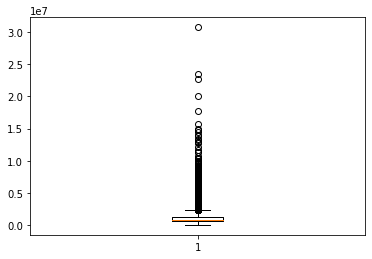

In [112]:
plt.boxplot(x='price',data=kc_data);

It does look like there is one data point that is vastly different from the rest and will be possibly removed for a more accurate analysis. 

In [117]:
# looking at more information on the outlier by filtering prices above 25M which is the maximun for most of the values
kc_data.loc[kc_data['price'] > 25000000]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
23470,5026900270,11/4/2021,30750000.00,1,3.50,2040,50705,2.00,YES,NO,...,PUBLIC,2000,410,0,890,1989,0,"1620 Lake Washington Boulevard, Seattle, Washi...",47.62,-122.28


The outlier at \$30M looks strange compared to the rest of the entries. It has only 1 bedroom, relatively small square footage

In [118]:
kc_data.isna().sum()

id                0
date              0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
greenbelt         0
nuisance          0
view              0
condition         0
grade             0
heat_source      32
sewer_system     14
sqft_above        0
sqft_basement     0
sqft_garage       0
sqft_patio        0
yr_built          0
yr_renovated      0
address           0
lat               0
long              0
dtype: int64

As seen above, only to columns have nulls, we will be dropping the rows as it will not significantly affect the 30K + dataset. 

## Data Preparation


In [119]:
# dropping null values, saving in place
kc_data = kc_data.dropna()
kc_data.shape

(30111, 25)

In [140]:
# sanity check
kc_data.isna().sum()

id                 0
date             904
price              0
bedrooms           0
bathrooms          0
sqft_living        0
sqft_lot           0
floors             0
waterfront         0
greenbelt          0
nuisance           0
view               0
condition          0
grade              0
heat_source        0
sewer_system       0
sqft_above         0
sqft_basement      0
sqft_garage        0
sqft_patio         0
yr_built           0
yr_renovated       0
address            0
lat                0
long               0
dtype: int64

After dropping null values, we still have a substantial amount of data to work with.

In [157]:
# converting date column to date time for analysis
kc_data['date'] = pd.to_datetime(wa_only_df['date'])
kc_data.describe(include='datetime')

<ipython-input-157-3b5d4b2b6c58>:3: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  kc_data.describe(include='datetime')


,date
count,29207
unique,365
top,2021-07-01 00:00:00
freq,192
first,2021-06-10 00:00:00
last,2022-06-09 00:00:00


We are working with data from June 2021 to June 2022. The date with the most sales is July 1st 2021.

In [158]:
kc_data['address'].value_counts()

Avenue, 108 Foothill Blvd, Rancho Cucamonga, California 91730, United States    38
Delridge Way Southwest, Seattle, Washington 98106, United States                24
9th Ave, Nebraska City, Nebraska 68410, United States                           21
South 35th Avenue, Bellevue, Nebraska 68123, United States                      20
A, Leadwood, Missouri 63653, United States                                      17
                                                                                ..
3410 61st Avenue Southwest, Seattle, Washington 98116, United States             1
514 Williams Avenue South, Renton, Washington 98057, United States               1
811 Northeast 63rd Street, Seattle, Washington 98115, United States              1
10036 California Avenue Southwest, Seattle, Washington 98146, United States      1
20329 292nd Avenue Southeast, Maple Valley, Washington 98038, United States      1
Name: address, Length: 29519, dtype: int64

Interestingly, it looks like there are entries for homes outside of Washington state. Will will filter out homes in WA only

In [168]:
# firltering homes that have "Washington" in the address and price is less than $25M
wa_only_df = kc_data[kc_data['address'].str.contains('Washington')]
wa_only_df = kc_only_df.loc[kc_only_df['price'] <= 25000000]
wa_only_df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
count,29207.00,29207.00,29207.00,29207.00,29207.00,29207.00,29207.00,29207.00,29207.00,29207.00,29207.00,29207.00,29207.00,29207.00,29207.00
mean,4536231586.30,1111934.40,3.44,2.33,2131.43,17108.83,1.52,1826.16,481.26,336.44,216.42,1973.89,93.60,47.54,-122.21
std,2881635597.03,878404.58,0.98,0.89,976.70,60793.69,0.55,880.10,586.06,286.17,246.70,31.67,422.28,0.18,0.43
min,1000055.00,27360.00,0.00,0.00,3.00,402.00,1.00,2.00,0.00,0.00,0.00,1900.00,0.00,38.52,-122.67
25%,2087350062.50,645000.00,3.00,2.00,1440.00,5000.00,1.00,1190.00,0.00,0.00,40.00,1952.00,0.00,47.43,-122.33
50%,3874000150.00,867950.00,3.00,2.50,1940.00,7560.00,1.50,1580.00,0.00,400.00,144.00,1976.00,0.00,47.56,-122.23
75%,7286800033.00,1310000.00,4.00,3.00,2640.00,10759.00,2.00,2290.00,960.00,519.00,310.00,2001.00,0.00,47.67,-122.13
max,9904000012.00,23500000.00,13.00,10.50,15360.00,3253932.00,4.00,12660.00,8020.00,3580.00,4370.00,2022.00,2022.00,48.11,-80.32


The dataset is now 29,207 rows after removing outlier and filtering out addresses outside WA.

In [169]:
# formatting to isolate by zipcode
wa_only_df['address'].str.split(',', expand=True)

,0,1,2,3,4,5
0,2102 Southeast 21st Court,Renton,Washington 98055,United States,None,None
1,11231 Greenwood Avenue North,Seattle,Washington 98133,United States,None,None
2,8504 South 113th Street,Seattle,Washington 98178,United States,None,None
3,4079 Letitia Avenue South,Seattle,Washington 98118,United States,None,None
4,2193 Northwest Talus Drive,Issaquah,Washington 98027,United States,None,None
...,...,...,...,...,...,...
30150,4673 Eastern Avenue North,Seattle,Washington 98103,United States,None,None
30151,4131 44th Avenue Southwest,Seattle,Washington 98116,United States,None,None
30152,910 Martin Luther King Jr Way,Seattle,Washington 98122,United States,None,None
30153,17127 114th Avenue Southeast,Renton,Washington 98055,United States,None,None


In [170]:
# # formatting to isolate by zipcode
wa_only_df= pd.concat([wa_only_df, wa_only_df['address'].str.split(',', expand=True)], axis=1,)

In [171]:
# formatting to isolate by zipcode
wa_only_df.rename(columns={0:'street_name',1:'city',2:'state_zip',3: 'country'}, inplace=True)
wa_only_df.drop(columns=[4,5,'address'], inplace=True)
wa_only_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long,street_name,city,state_zip,country
0,7399300360,5/24/2022,675000.00,4,1.00,1180,7140,1.00,NO,NO,...,0,40,1969,0,47.46,-122.19,2102 Southeast 21st Court,Renton,Washington 98055,United States
1,8910500230,12/13/2021,920000.00,5,2.50,2770,6703,1.00,NO,NO,...,0,240,1950,0,47.71,-122.36,11231 Greenwood Avenue North,Seattle,Washington 98133,United States
2,1180000275,9/29/2021,311000.00,6,2.00,2880,6156,1.00,NO,NO,...,0,0,1956,0,47.50,-122.23,8504 South 113th Street,Seattle,Washington 98178,United States
3,1604601802,12/14/2021,775000.00,3,3.00,2160,1400,2.00,NO,NO,...,200,270,2010,0,47.57,-122.29,4079 Letitia Avenue South,Seattle,Washington 98118,United States
4,8562780790,8/24/2021,592500.00,2,2.00,1120,758,2.00,NO,NO,...,550,30,2012,0,47.53,-122.07,2193 Northwest Talus Drive,Issaquah,Washington 98027,United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,7834800180,11/30/2021,1555000.00,5,2.00,1910,4000,1.50,NO,NO,...,0,210,1921,0,47.66,-122.33,4673 Eastern Avenue North,Seattle,Washington 98103,United States
30151,194000695,6/16/2021,1313000.00,3,2.00,2020,5800,2.00,NO,NO,...,0,520,2011,0,47.57,-122.39,4131 44th Avenue Southwest,Seattle,Washington 98116,United States
30152,7960100080,5/27/2022,800000.00,3,2.00,1620,3600,1.00,NO,NO,...,240,110,1995,0,47.61,-122.30,910 Martin Luther King Jr Way,Seattle,Washington 98122,United States
30153,2781280080,2/24/2022,775000.00,3,2.50,2570,2889,2.00,NO,NO,...,480,100,2006,0,47.45,-122.19,17127 114th Avenue Southeast,Renton,Washington 98055,United States


In [172]:
# formatting to isolate by zipcode
wa_only_df = pd.concat([wa_only_df, wa_only_df['state_zip'].str.split(' ', expand=True)], axis=1,)

In [173]:
# formatting to isolate by zipcode
wa_only_df.rename(columns={1:'state', 2: 'zip_code'}, inplace=True)
wa_only_df.drop(columns=['state_zip', 'country', 0], inplace=True)
wa_only_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long,street_name,city,state,zip_code
0,7399300360,5/24/2022,675000.00,4,1.00,1180,7140,1.00,NO,NO,...,0,40,1969,0,47.46,-122.19,2102 Southeast 21st Court,Renton,Washington,98055
1,8910500230,12/13/2021,920000.00,5,2.50,2770,6703,1.00,NO,NO,...,0,240,1950,0,47.71,-122.36,11231 Greenwood Avenue North,Seattle,Washington,98133
2,1180000275,9/29/2021,311000.00,6,2.00,2880,6156,1.00,NO,NO,...,0,0,1956,0,47.50,-122.23,8504 South 113th Street,Seattle,Washington,98178
3,1604601802,12/14/2021,775000.00,3,3.00,2160,1400,2.00,NO,NO,...,200,270,2010,0,47.57,-122.29,4079 Letitia Avenue South,Seattle,Washington,98118
4,8562780790,8/24/2021,592500.00,2,2.00,1120,758,2.00,NO,NO,...,550,30,2012,0,47.53,-122.07,2193 Northwest Talus Drive,Issaquah,Washington,98027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,7834800180,11/30/2021,1555000.00,5,2.00,1910,4000,1.50,NO,NO,...,0,210,1921,0,47.66,-122.33,4673 Eastern Avenue North,Seattle,Washington,98103
30151,194000695,6/16/2021,1313000.00,3,2.00,2020,5800,2.00,NO,NO,...,0,520,2011,0,47.57,-122.39,4131 44th Avenue Southwest,Seattle,Washington,98116
30152,7960100080,5/27/2022,800000.00,3,2.00,1620,3600,1.00,NO,NO,...,240,110,1995,0,47.61,-122.30,910 Martin Luther King Jr Way,Seattle,Washington,98122
30153,2781280080,2/24/2022,775000.00,3,2.50,2570,2889,2.00,NO,NO,...,480,100,2006,0,47.45,-122.19,17127 114th Avenue Southeast,Renton,Washington,98055


After formatting the address column to isolate by zipcode, we want to look into other columns that may not be useful in our analysis.

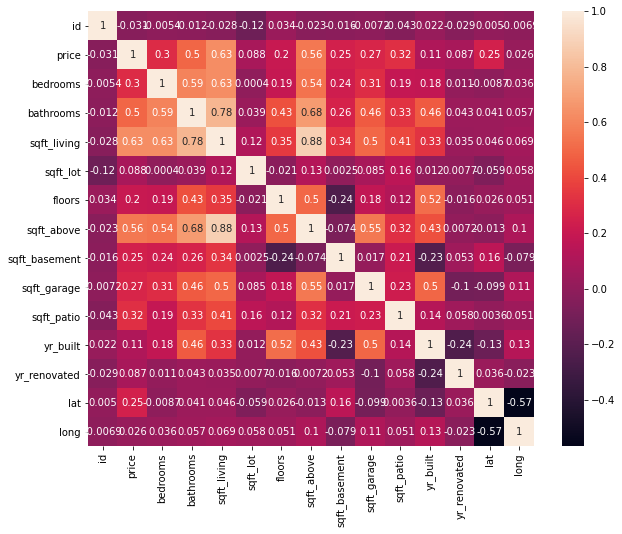

In [184]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(wa_only_df.corr(), annot=True)
plt.show()

The strongest correlation with price is sqft_living, followed by sqft_above, bathrooms, sqft_patio and bedrooms. 

In [199]:
wa_only_df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
count,29207.00,29207.00,29207.00,29207.00,29207.00,29207.00,29207.00,29207.00,29207.00,29207.00,29207.00,29207.00,29207.00,29207.00,29207.00
mean,4536231586.30,1111934.40,3.44,2.33,2131.43,17108.83,1.52,1826.16,481.26,336.44,216.42,1973.89,93.60,47.54,-122.21
std,2881635597.03,878404.58,0.98,0.89,976.70,60793.69,0.55,880.10,586.06,286.17,246.70,31.67,422.28,0.18,0.43
min,1000055.00,27360.00,0.00,0.00,3.00,402.00,1.00,2.00,0.00,0.00,0.00,1900.00,0.00,38.52,-122.67
25%,2087350062.50,645000.00,3.00,2.00,1440.00,5000.00,1.00,1190.00,0.00,0.00,40.00,1952.00,0.00,47.43,-122.33
50%,3874000150.00,867950.00,3.00,2.50,1940.00,7560.00,1.50,1580.00,0.00,400.00,144.00,1976.00,0.00,47.56,-122.23
75%,7286800033.00,1310000.00,4.00,3.00,2640.00,10759.00,2.00,2290.00,960.00,519.00,310.00,2001.00,0.00,47.67,-122.13
max,9904000012.00,23500000.00,13.00,10.50,15360.00,3253932.00,4.00,12660.00,8020.00,3580.00,4370.00,2022.00,2022.00,48.11,-80.32


<AxesSubplot:xlabel='sqft_living', ylabel='price'>

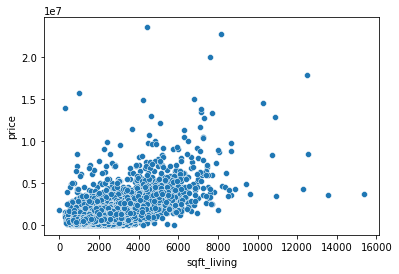

In [198]:
sns.scatterplot(y=wa_only_df['price'], x=wa_only_df['sqft_living'])

There is an incorrect entry based on the .describe() showing sqft_living of 3 and according to reasearch, it is listed on "Redfin.com" as 3,325 sqft. https://www.redfin.com/WA/Duvall/31072-NE-165th-St-98019/home/22591192. Several other entries followed the same pattern and we decided to remove entries with sqft_living less than 500.

In [200]:
wa_only_df.loc[wa_only_df['sqft_living'] == 3]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long,street_name,city,state,zip_code
14977,1549500215,12/17/2021,1803000.00,4,4.00,3,326701,2.00,NO,NO,...,1,0,2021,0,47.75,-121.92,31072 Northeast 165th Street,Duvall,Washington,98019


In [206]:
# updating sqft entry 14977
wa_only_df.loc[14977, 'sqft_living'] = 3325
wa_only_df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
count,29207.00,29207.00,29207.00,29207.00,29207.00,29207.00,29207.00,29207.00,29207.00,29207.00,29207.00,29207.00,29207.00,29207.00,29207.00
mean,4536231586.30,1111934.40,3.44,2.33,2131.55,17108.83,1.52,1826.16,481.26,336.44,216.42,1973.89,93.60,47.54,-122.21
std,2881635597.03,878404.58,0.98,0.89,976.64,60793.69,0.55,880.10,586.06,286.17,246.70,31.67,422.28,0.18,0.43
min,1000055.00,27360.00,0.00,0.00,260.00,402.00,1.00,2.00,0.00,0.00,0.00,1900.00,0.00,38.52,-122.67
25%,2087350062.50,645000.00,3.00,2.00,1440.00,5000.00,1.00,1190.00,0.00,0.00,40.00,1952.00,0.00,47.43,-122.33
50%,3874000150.00,867950.00,3.00,2.50,1940.00,7560.00,1.50,1580.00,0.00,400.00,144.00,1976.00,0.00,47.56,-122.23
75%,7286800033.00,1310000.00,4.00,3.00,2640.00,10759.00,2.00,2290.00,960.00,519.00,310.00,2001.00,0.00,47.67,-122.13
max,9904000012.00,23500000.00,13.00,10.50,15360.00,3253932.00,4.00,12660.00,8020.00,3580.00,4370.00,2022.00,2022.00,48.11,-80.32


In [215]:
wa_no_outliers = wa_only_df.loc[wa_only_df['sqft_living'] > 500]

In [217]:
wa_no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29137 entries, 0 to 30154
Data columns (total 28 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             29137 non-null  int64  
 1   date           29137 non-null  object 
 2   price          29137 non-null  float64
 3   bedrooms       29137 non-null  int64  
 4   bathrooms      29137 non-null  float64
 5   sqft_living    29137 non-null  int64  
 6   sqft_lot       29137 non-null  int64  
 7   floors         29137 non-null  float64
 8   waterfront     29137 non-null  object 
 9   greenbelt      29137 non-null  object 
 10  nuisance       29137 non-null  object 
 11  view           29137 non-null  object 
 12  condition      29137 non-null  object 
 13  grade          29137 non-null  object 
 14  heat_source    29137 non-null  object 
 15  sewer_system   29137 non-null  object 
 16  sqft_above     29137 non-null  int64  
 17  sqft_basement  29137 non-null  int64  
 18  sqft_g

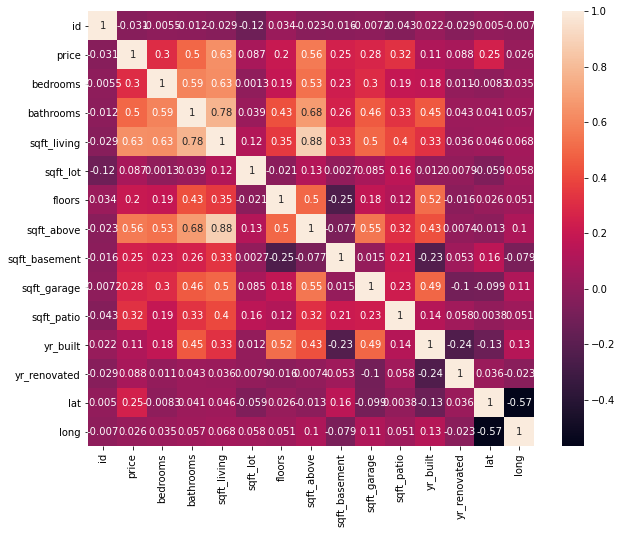

In [218]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(wa_no_outliers.corr(), annot=True)
plt.show()

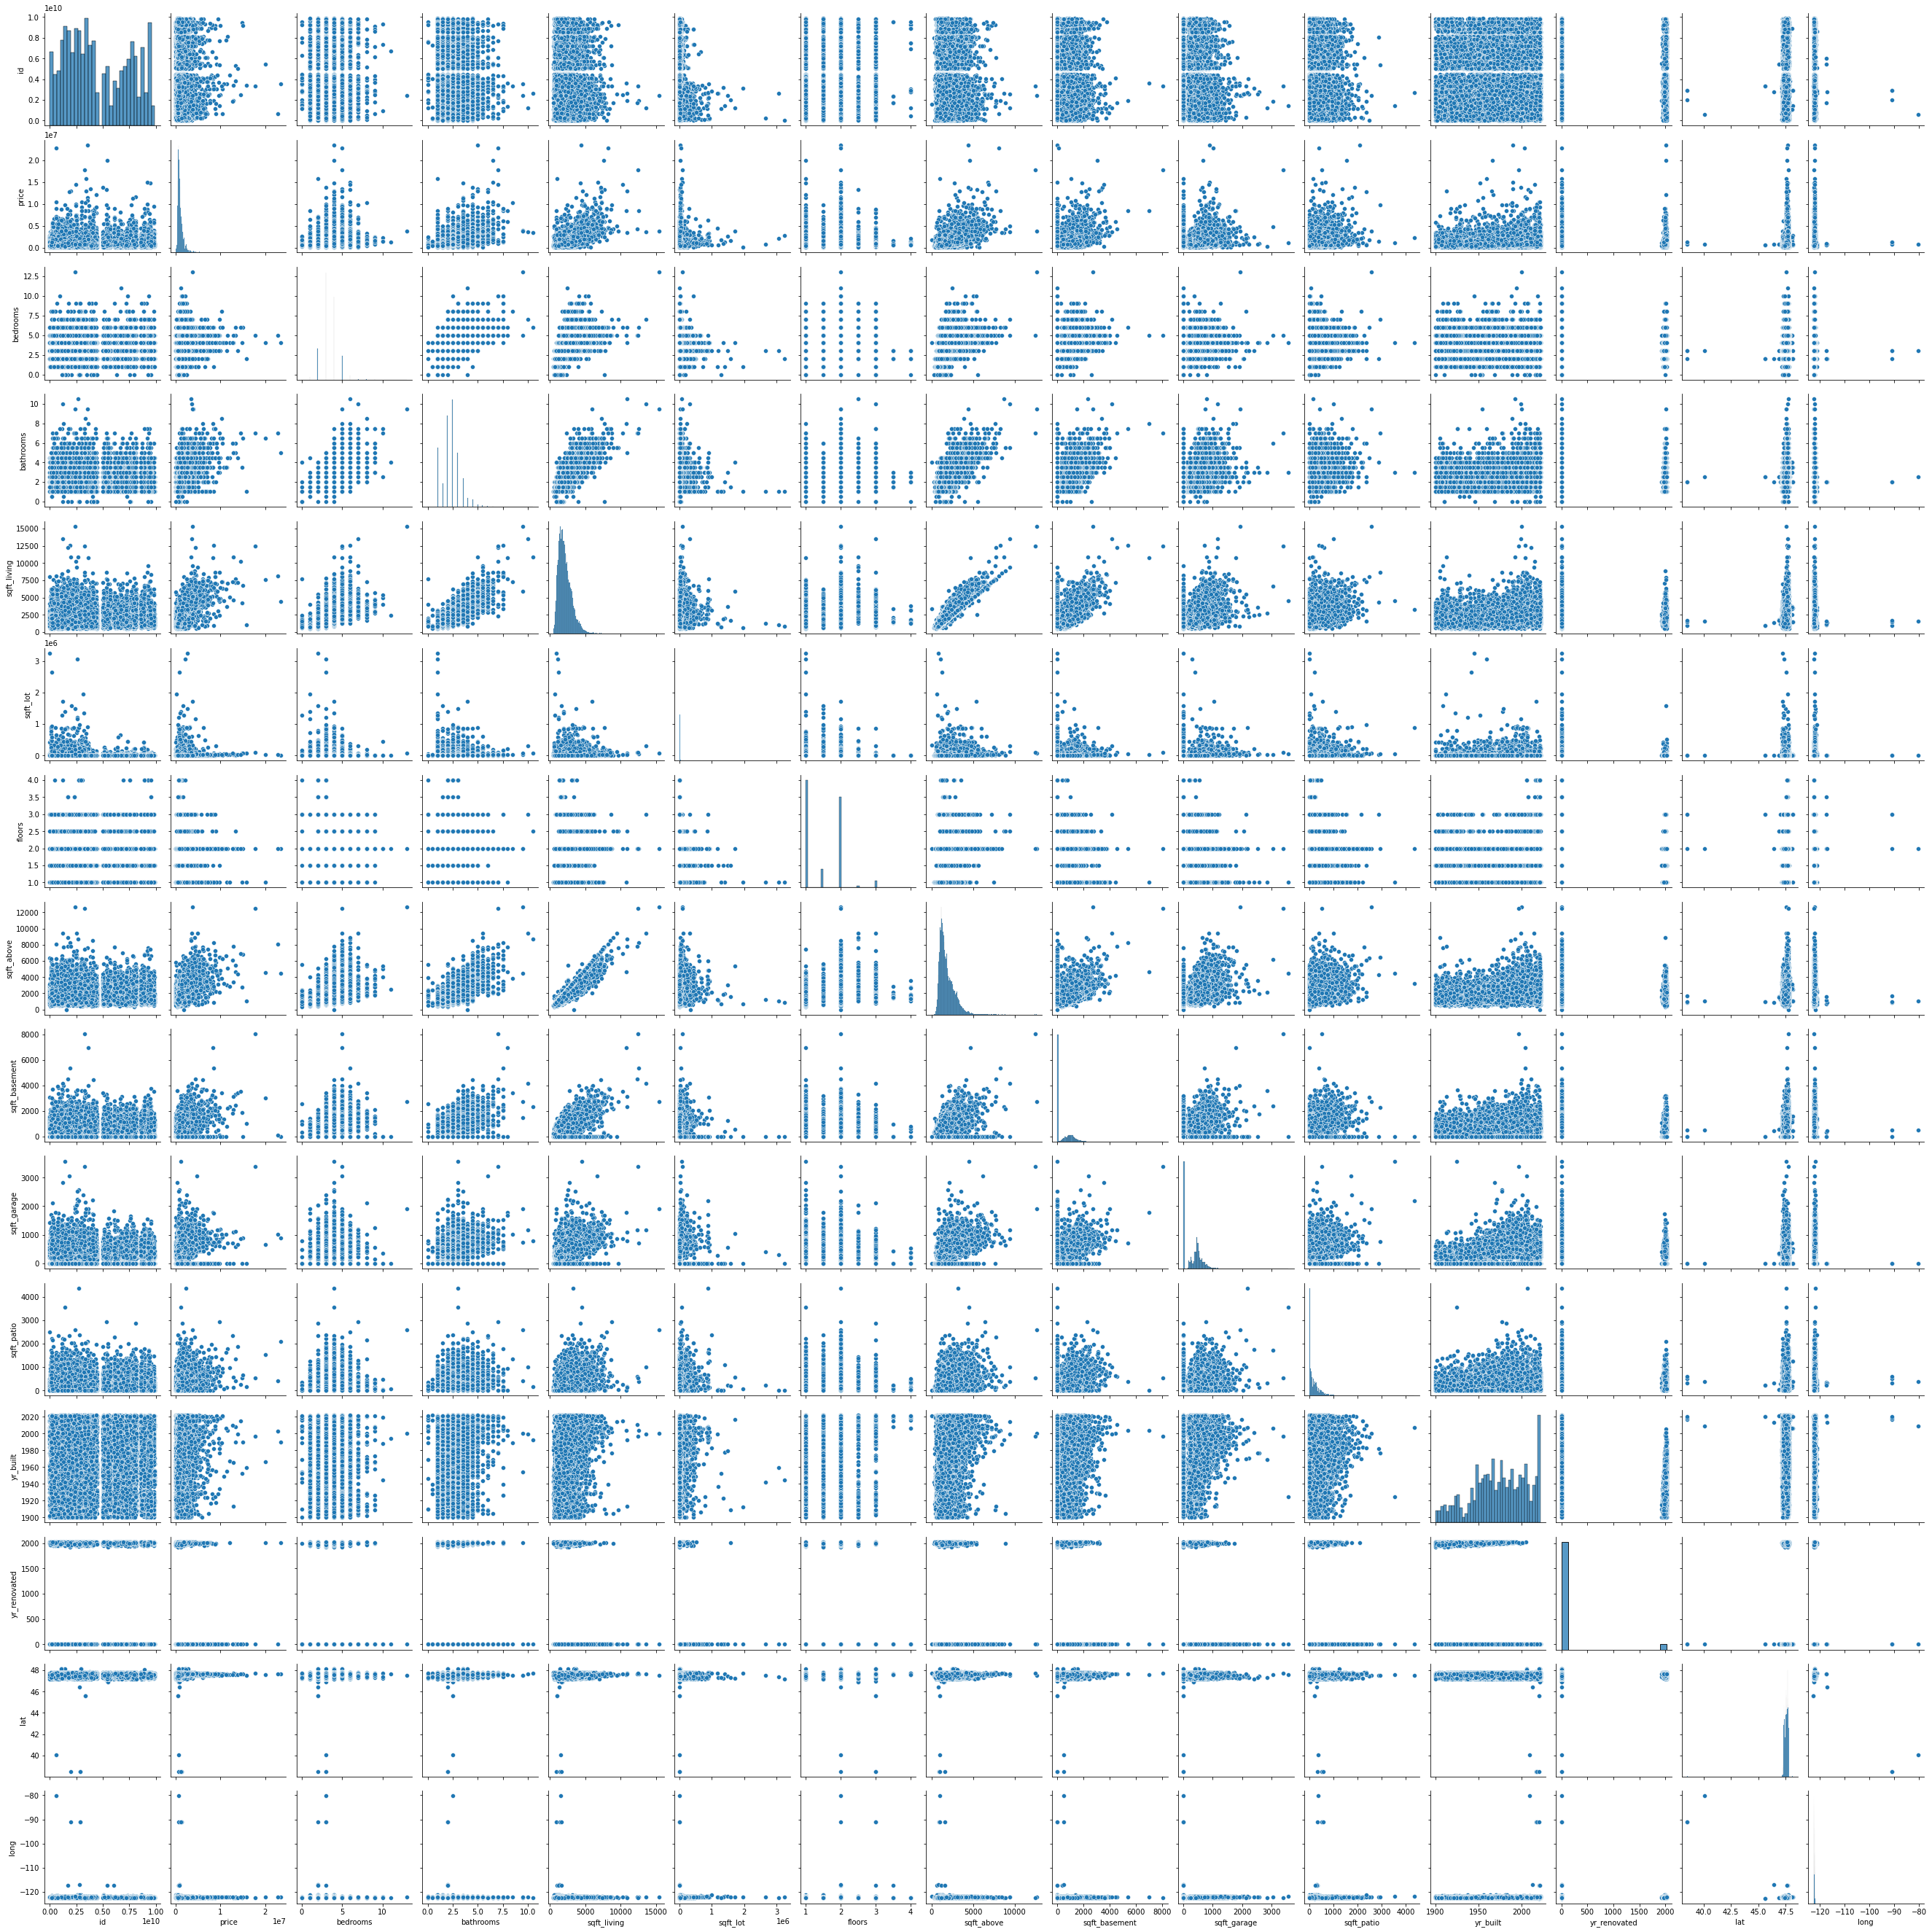

In [219]:
sns.pairplot(wa_no_outliers)

## Data Modeling


## Evaluation


## Conclusions


## Next Steps